## Problem Statement

### Business Context

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

### Objective

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired the firm EasyVisa for data-driven solutions. You as a data  scientist at EasyVisa have to analyze the data provided and, with the help of a classification model:

* Facilitate the process of visa approvals.
* Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status.

### Data Description

The data contains the different attributes of employee and the employer. The detailed data dictionary is given below.

* case_id: ID of each visa application
* continent: Information of continent the employee
* education_of_employee: Information of education of the employee
* has_job_experience: Does the employee has any job experience? Y= Yes; N = No
* requires_job_training: Does the employee require any job training? Y = Yes; N = No
* no_of_employees: Number of employees in the employer's company
* yr_of_estab: Year in which the employer's company was established
* region_of_employment: Information of foreign worker's intended region of employment in the US.
* prevailing_wage:  Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment.
* unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
* case_status:  Flag indicating if the Visa was certified or denied

## Installing and Importing the necessary libraries

In [ ]:
# Installing the libraries with the specified version.
#!pip install numpy==1.25.2 pandas==1.5.3 scikit-learn==1.5.2 matplotlib==3.7.1 seaborn==0.13.1 xgboost==2.0.3 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the below.*

In [ ]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To tune model, get different metric scores, and split data
from sklearn import metrics
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
)
from sklearn.model_selection import train_test_split

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To do hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To help with model building
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier

# To suppress scientific notations
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To supress warnings
import warnings

warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Import Dataset

In [ ]:
visa_data = pd.read_csv('/content/drive/MyDrive/ml_course/Secition 3 Advanced Machine Learning/Week2 Boosting/Project/EasyVisa.csv')

In [ ]:
data = visa_data.copy()

## Overview of the Dataset

#### View the first and last 5 rows of the dataset

In [ ]:
data.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


#### Understand the shape of the dataset

In [ ]:
data.shape

(25480, 12)

#### Check the data types of the columns for the dataset

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


## Exploratory Data Analysis (EDA)

#### Let's check the statistical summary of the data

In [ ]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
case_id,25480,25480,EZYV25480,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
continent,25480,6,Asia,16861,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education_of_employee,25480,4,Bachelor's,10234,NaN,NaN,NaN,NaN,NaN,NaN,NaN
has_job_experience,25480,2,Y,14802,NaN,NaN,NaN,NaN,NaN,NaN,NaN
requires_job_training,25480,2,N,22525,NaN,NaN,NaN,NaN,NaN,NaN,NaN
no_of_employees,25480.0,NaN,NaN,NaN,5667.04321,22877.928848,-26.0,1022.0,2109.0,3504.0,602069.0
yr_of_estab,25480.0,NaN,NaN,NaN,1979.409929,42.366929,1800.0,1976.0,1997.0,2005.0,2016.0
region_of_employment,25480,5,Northeast,7195,NaN,NaN,NaN,NaN,NaN,NaN,NaN
prevailing_wage,25480.0,NaN,NaN,NaN,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27
unit_of_wage,25480,4,Year,22962,NaN,NaN,NaN,NaN,NaN,NaN,NaN


*   We can see that the minimum number of employees is -26.0 which is most likely an input error which needs to be fixed
*   number of employees also has a very wide range and high std suggesting outliers
*   the prevailing wage will have a wide range because there are varying units of wages from hourly to yearly, this will need to be accounted for

#### Fixing the negative values in number of employees columns

In [ ]:
(data['no_of_employees'] < 0).sum().sum()

np.int64(33)

In [ ]:
data['no_of_employees'] = abs(data['no_of_employees'])

There are 33 negative values in the no_of_employees column.

Since this could be the result of an input error, we'll treat the negative numbers as positives.

In [ ]:
(data['no_of_employees'] < 0).sum().sum()

np.int64(0)

#### Let's check the count of each unique category in each of the categorical variables

In [ ]:
for feature in data.columns:
    if data[feature].dtype == 'object':
        print(data[feature].value_counts())
        print("-" * 50)

case_id
EZYV25480    1
EZYV01       1
EZYV02       1
EZYV03       1
EZYV04       1
            ..
EZYV13       1
EZYV12       1
EZYV11       1
EZYV10       1
EZYV09       1
Name: count, Length: 25480, dtype: int64
--------------------------------------------------
continent
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: count, dtype: int64
--------------------------------------------------
education_of_employee
Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: count, dtype: int64
--------------------------------------------------
has_job_experience
Y    14802
N    10678
Name: count, dtype: int64
--------------------------------------------------
requires_job_training
N    22525
Y     2955
Name: count, dtype: int64
--------------------------------------------------
region_of_employment
Northeast    7195
South        7017
West         6586
Midwest      

### Univariate Analysis

In [ ]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

#### Observations on education of employee

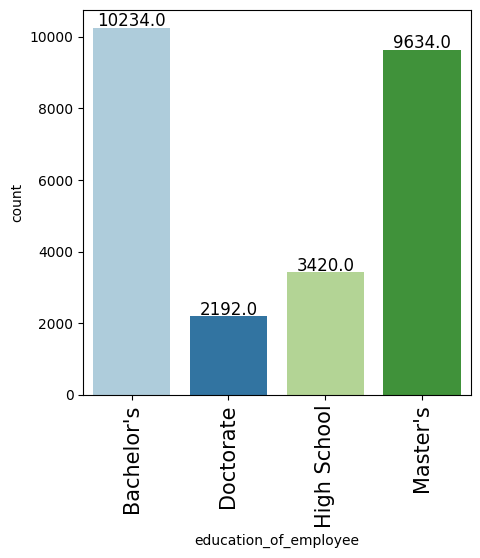

In [ ]:
labeled_barplot(data, 'education_of_employee')

We can see that the majority of applicants have a Bachelor's and Master's degree

#### Observations on region of employment

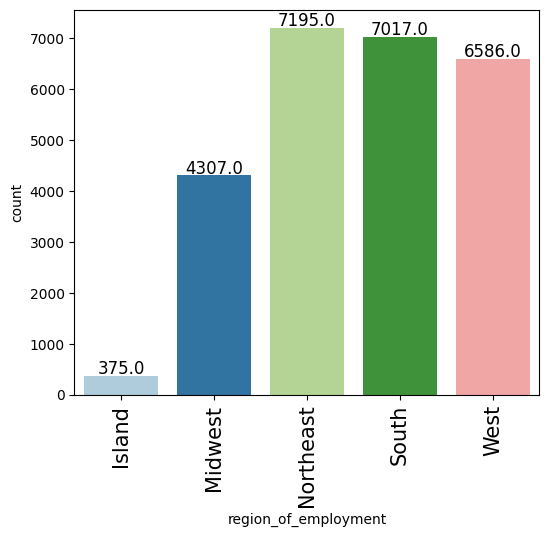

In [ ]:
labeled_barplot(data, 'region_of_employment')

Most employers are located in the Northeast, South, and West region

#### Observations on job experience

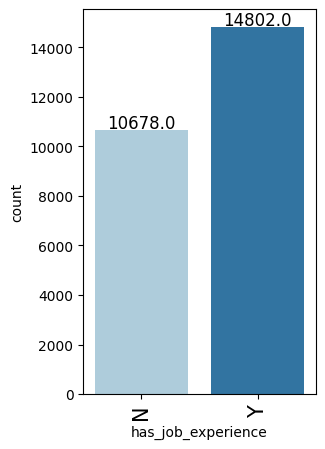

In [ ]:
labeled_barplot(data, 'has_job_experience')

The majority have job experience but a surprising amount does not

#### Observations on case status

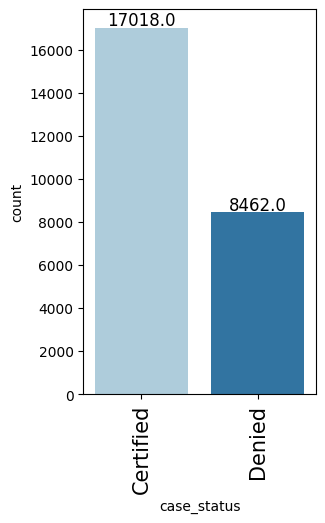

In [ ]:
labeled_barplot(data, 'case_status')

About twice as many applicants are certified then denied

### Bivariate Analysis

**Creating functions that will help us with further analysis.**

In [ ]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [ ]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

#### Those with higher education may want to travel abroad for a well-paid job. Let's find out if education has any impact on visa certification

case_status            Certified  Denied    All
education_of_employee                          
All                        17018    8462  25480
Bachelor's                  6367    3867  10234
High School                 1164    2256   3420
Master's                    7575    2059   9634
Doctorate                   1912     280   2192
------------------------------------------------------------------------------------------------------------------------


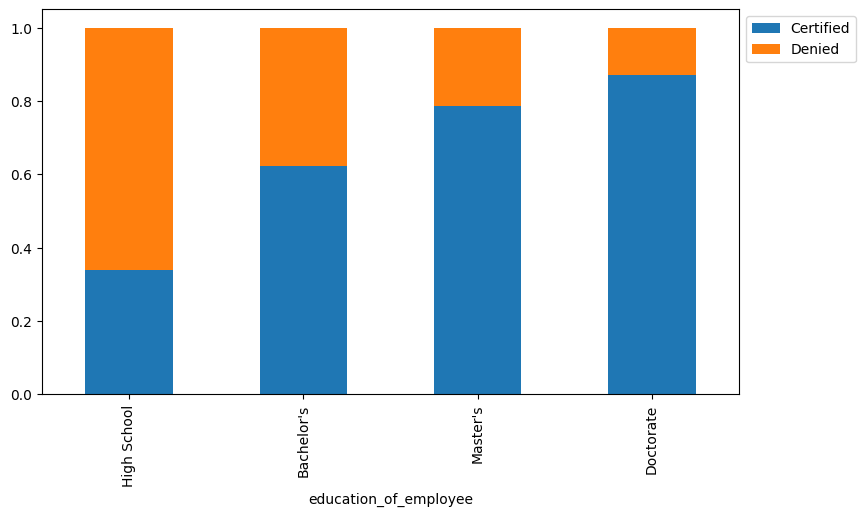

In [ ]:
stacked_barplot(data, 'education_of_employee', 'case_status')

We can see that the higher the level of education the higher the rate of acceptance

#### Lets' similarly check for the continents and find out how the visa status vary across different continents.

case_status    Certified  Denied    All
continent                              
All                17018    8462  25480
Asia               11012    5849  16861
North America       2037    1255   3292
Europe              2957     775   3732
South America        493     359    852
Africa               397     154    551
Oceania              122      70    192
------------------------------------------------------------------------------------------------------------------------


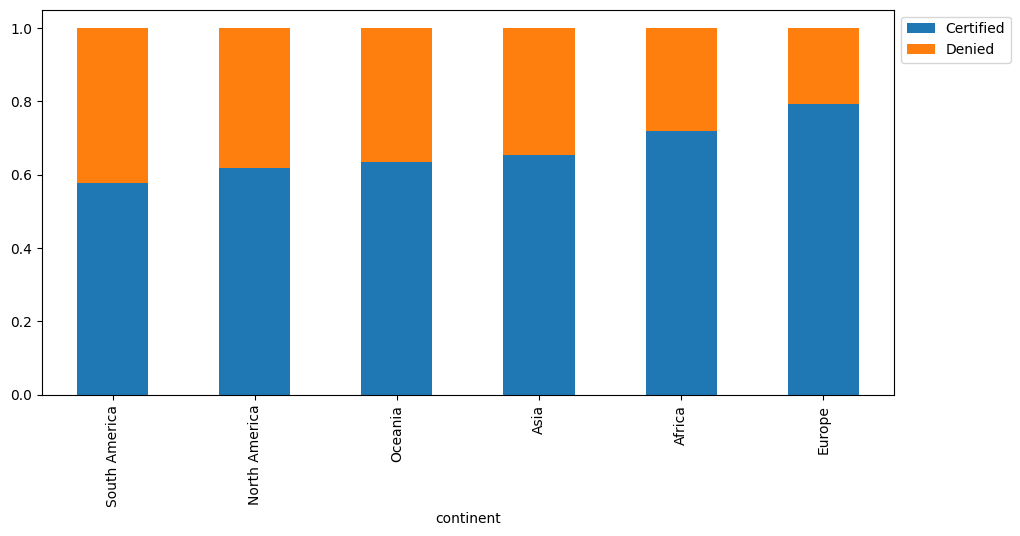

In [ ]:
stacked_barplot(data, 'continent', 'case_status')

Those in Europe get certified the most, then Africa, and Asia
South America has the least amount of certified

#### Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Let's see if having work experience has any influence over visa certification

case_status         Certified  Denied    All
has_job_experience                          
All                     17018    8462  25480
N                        5994    4684  10678
Y                       11024    3778  14802
------------------------------------------------------------------------------------------------------------------------


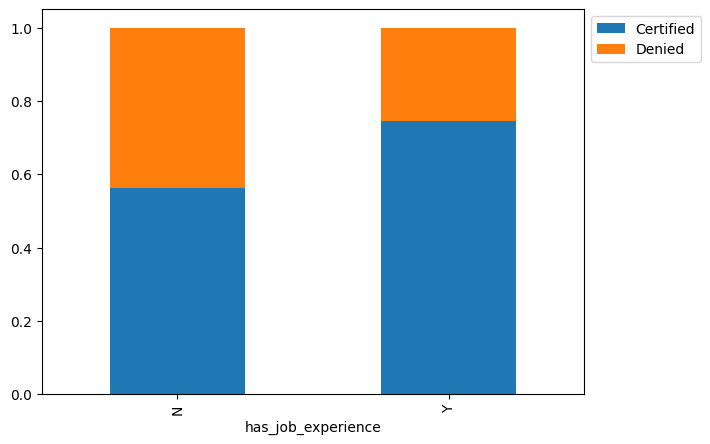

In [ ]:
stacked_barplot(data, 'has_job_experience', 'case_status')

Those with job experience tend to get more certified then not.
For those without experience it is almost 60 certified to 40 not

#### Checking if the prevailing wage is similar across all the regions of the US

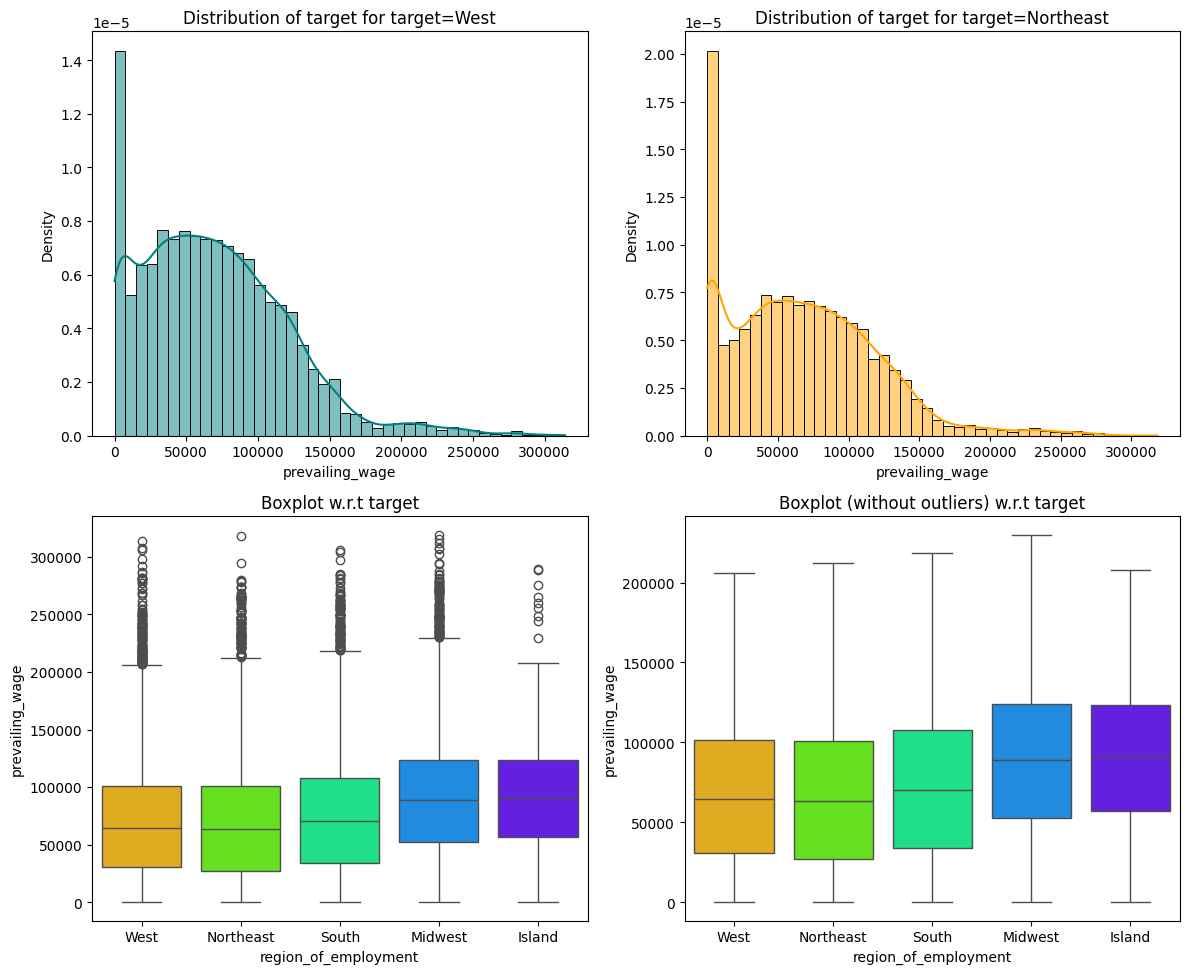

In [ ]:
distribution_plot_wrt_target(data, 'prevailing_wage', 'region_of_employment')

*   We can see that the wage is lowest in the regions with the most employers, Northeast and West, while regions with less employers (Midwest and Island) have a higher average wage.

*   We can also visualize the number of outliers in each region

#### The US government has established a prevailing wage to protect local talent and foreign workers. Let's analyze the data and see if the visa status changes with the prevailing wage

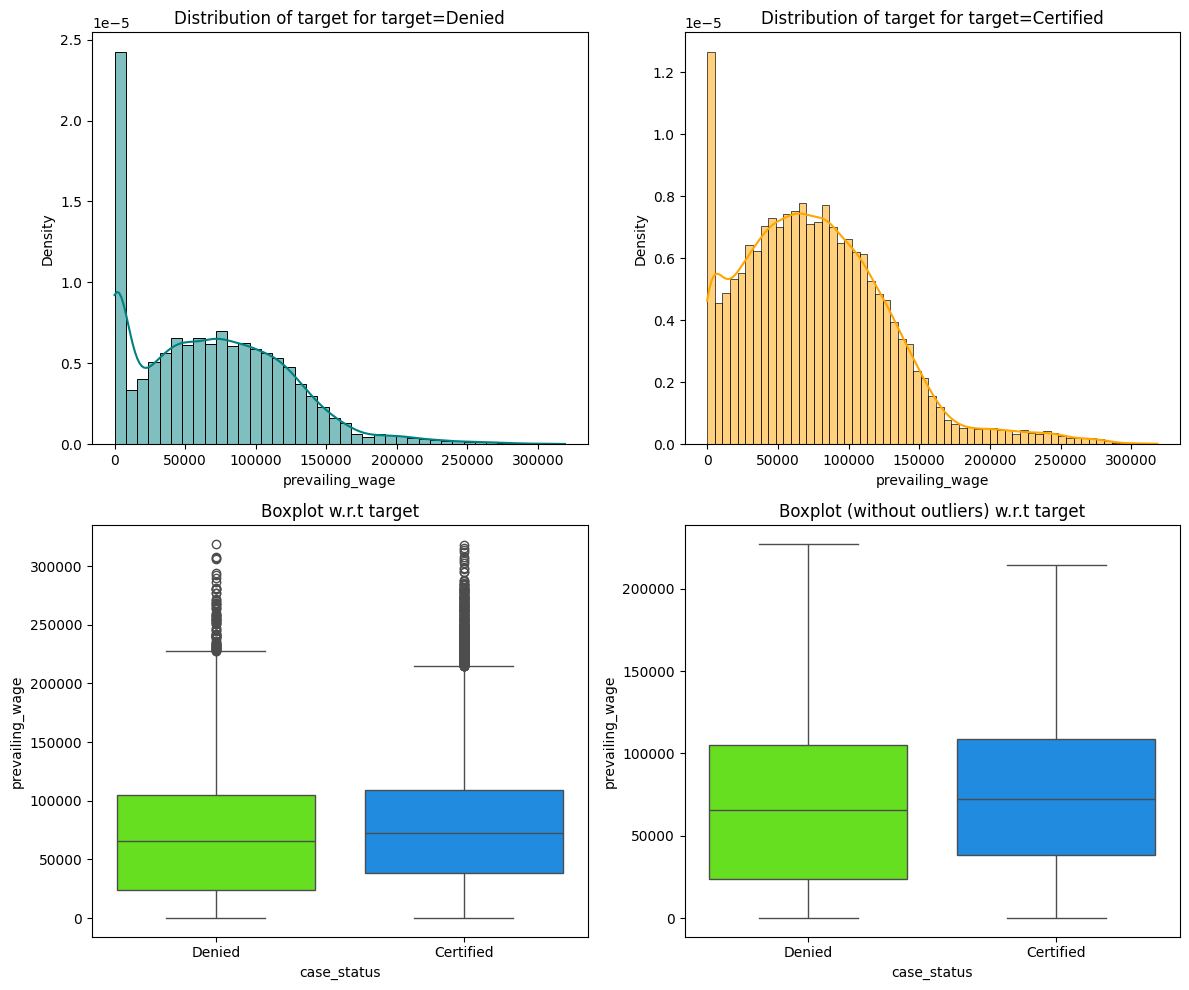

In [ ]:
distribution_plot_wrt_target(data, 'prevailing_wage', 'case_status')

It doesn't seem that the visa status changes with prevailing wage

#### The prevailing wage has different units (Hourly, Weekly, etc). Let's find out if it has any impact on visa applications getting certified.

case_status   Certified  Denied    All
unit_of_wage                          
All               17018    8462  25480
Year              16047    6915  22962
Hour                747    1410   2157
Week                169     103    272
Month                55      34     89
------------------------------------------------------------------------------------------------------------------------


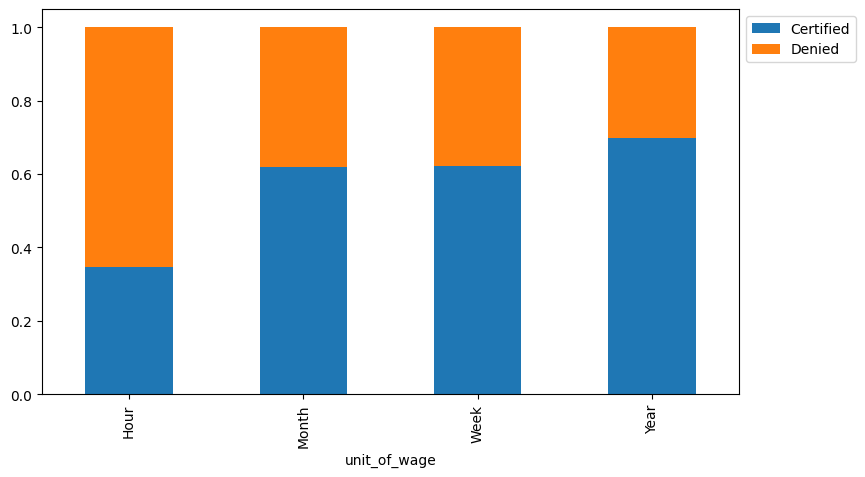

In [ ]:
stacked_barplot(data, 'unit_of_wage', 'case_status')

We can see that yearly, weekly, and monthly have almost the same rate of acceptance, whereas hourly is the lowest with less then half.

## Data Pre-processing

### Outlier Check

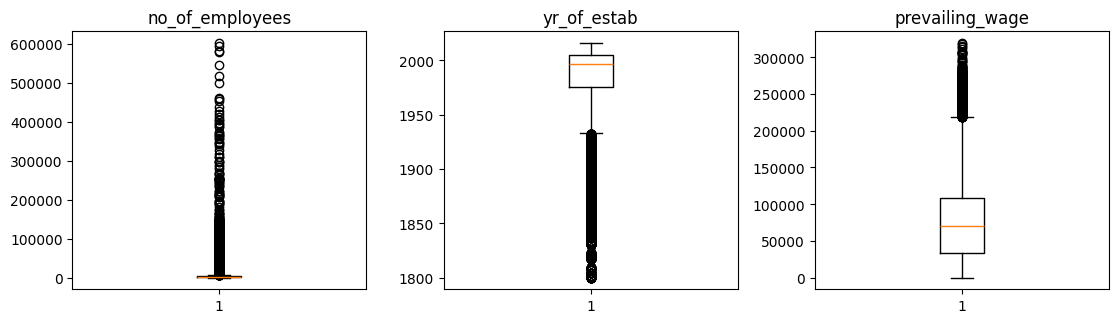

In [ ]:
# outlier detection using boxplot
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()


plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

*   There are a high number of outliers in the number of employees which is normal since companies can range from small to large.

* There are also a high number of outliers in year of establishment which is fine since there many old companies still operating today

*   The prevailing wage also has some outliers which is expected since some employees will be paid far more for their role.
*   Although we will not treat the outliers since they most likely represent real values.

### Data Preparation for modeling

We can clean up the year of establishment by replacing the date with how long its existed

In [ ]:
data['yr_of_estab'] = 2017 - data['yr_of_estab']

We'll drop the case id since its not a unique feature

In [ ]:
data.drop(labels=['case_id'], inplace=True, axis=1)

We'll then encode the categorical features and begin splitting the data

In [ ]:
# create a struct for encoding the case status
replaceStruct = {'case_status': {'Denied': 0,'Certified':1}}

# create a list of features that will get dummy values
oneHotCols = ['continent',	'education_of_employee',	'has_job_experience',	'requires_job_training', 'region_of_employment', 'unit_of_wage',	'full_time_position']

data = data.replace(replaceStruct)
data = pd.get_dummies(data, columns=oneHotCols)

In [ ]:
X = data.drop(['case_status'], axis=1)
y = data['case_status']

X = X.astype(float)

In [ ]:
X.shape

(25480, 28)

In [ ]:
# Splitting data into training, validation and test set:

# first we split data into 2 parts, say temporary and test
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1, stratify=y
)

# then we split the temporary set into train and validation
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=1, stratify=y_temp
)

print(X_train.shape, X_val.shape, X_test.shape)

(15288, 28) (5096, 28) (5096, 28)


In [ ]:
# Checking class balance for whole data, train set, validation set, and test set

print("Target value ratio in y")
print(y.value_counts(1))
print("*" * 80)
print("Target value ratio in y_train")
print(y_train.value_counts(1))
print("*" * 80)
print("Target value ratio in y_val")
print(y_val.value_counts(1))
print("*" * 80)
print("Target value ratio in y_test")
print(y_test.value_counts(1))
print("*" * 80)

Target value ratio in y
case_status
1   0.668
0   0.332
Name: proportion, dtype: float64
********************************************************************************
Target value ratio in y_train
case_status
1   0.668
0   0.332
Name: proportion, dtype: float64
********************************************************************************
Target value ratio in y_val
case_status
1   0.668
0   0.332
Name: proportion, dtype: float64
********************************************************************************
Target value ratio in y_test
case_status
1   0.668
0   0.332
Name: proportion, dtype: float64
********************************************************************************


We can see that the target variable is imbalanced, we will address this later on

## Model Building

### Model Evaluation Criterion

In [ ]:

def get_all_model_scores(model, X_train, y_train):

    pred_train = model.predict(X_train)
    pred_val = model.predict(X_val)

    train_acc = accuracy_score(y_train,pred_train)
    val_acc = accuracy_score(y_val,pred_val)

    train_recall = recall_score(y_train,pred_train)
    val_recall = recall_score(y_val,pred_val)

    train_precision = precision_score(y_train,pred_train)
    val_precision = precision_score(y_val,pred_val)

    train_f1 = f1_score(y_train,pred_train)
    val_f1 = f1_score(y_val,pred_val)

    df_perf = pd.DataFrame({'Accuracy':[train_acc,val_acc],
                            'Recall':[train_recall,val_recall],
                            'Precision':[train_precision,val_precision],
                            'F1':[train_f1,val_f1]}, index=['Train','Validation'])

    return df_perf

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn


def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [ ]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

#### Defining scorer to be used for cross-validation and hyperparameter tuning

**We are now done with pre-processing and evaluation criterion, so let's start building the model.**

## Model Criteria

**Model can make wrong predictions as:**

* Predicting an applicant would be denied but would actually be certified (FN)
* Predicting an applicant would be certified but would actually be denied (FP)

**Which case is more important?**

* If the model predicts a case as certified but its really denied then it will take the job from a potential US applicant.
* If the model predicts a case as denied but it really is certified then it will wrongfully deny a certified case.

* It is best to reduce both these case since we dont want to risk either a False Negative or a False Positive.

**How to reduce the losses?**

The company would want the f1 score to be maximized, this way it minimizes both False Negatives and False Positives.

### Model building with original data

In [ ]:
models1 = []  # Empty list to store all the models

# Appending models into the list
models1.append(("DecisionTree", DecisionTreeClassifier(random_state=1, class_weight='balanced')))
models1.append(("Bagging", BaggingClassifier(random_state=1)))
models1.append(("Random Forest", RandomForestClassifier(random_state=1, class_weight='balanced')))
models1.append(("GradientBoosting", GradientBoostingClassifier(random_state=1)))
models1.append(("AdaBoost", AdaBoostClassifier(random_state=1)))
models1.append(("XGBoost", XGBClassifier(random_state=1, eval_metrics='logloss')))

print("\nTraining and Validation Performance Difference:\n")

for name, model in models1:
    model.fit(X_train, y_train)
    scores_train = f1_score(y_train, model.predict(X_train))
    scores_val = f1_score(y_val, model.predict(X_val))
    difference1 = scores_train - scores_val
    print("{}: Training Score: {:.4f}, Validation Score: {:.4f}, Difference: {:.4f}".format(name, scores_train, scores_val, difference1))


Training and Validation Performance Difference:

DecisionTree: Training Score: 1.0000, Validation Score: 0.7466, Difference: 0.2534
Bagging: Training Score: 0.9895, Validation Score: 0.7777, Difference: 0.2118
Random Forest: Training Score: 1.0000, Validation Score: 0.8050, Difference: 0.1950
GradientBoosting: Training Score: 0.8286, Validation Score: 0.8257, Difference: 0.0029
AdaBoost: Training Score: 0.8196, Validation Score: 0.8184, Difference: 0.0012
XGBoost: Training Score: 0.9004, Validation Score: 0.8089, Difference: 0.0914


* We can see that Adaboost and GradientBoost had the highest recall scores and the lowest differences however they seem to be overfitting the data
* XGBoost is the next highest and we can check other scores to see if its overfitting
* Random Forest is also performing well but is overfitting the data, we can fine tune this one

In [ ]:
model = models1[5][1]
get_all_model_scores(model, X_train, y_train)

,Accuracy,Recall,Precision,F1
Train,0.860,0.945,0.860,0.900
Validation,0.730,0.855,0.767,0.809


* It seems the model is working well and not overfitting

### Model Building with oversampled data



In [ ]:
# Fit SMOTE on train data(Synthetic Minority Oversampling Technique)
sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)

In [ ]:
print("Before OverSampling, count of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, count of label '0': {} \n".format(sum(y_train == 0)))

print("After OverSampling, count of label '1': {}".format(sum(y_train_over == 1)))
print("After OverSampling, count of label '0': {} \n".format(sum(y_train_over == 0)))

print("After OverSampling, the shape of train_X: {}".format(X_train_over.shape))
print("After OverSampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before OverSampling, count of label '1': 10210
Before OverSampling, count of label '0': 5078 

After OverSampling, count of label '1': 10210
After OverSampling, count of label '0': 10210 

After OverSampling, the shape of train_X: (20420, 28)
After OverSampling, the shape of train_y: (20420,) 



In [ ]:
models2 = []  # Empty list to store all the models

# Appending models into the list
models2.append(("DecisionTree Oversampled", DecisionTreeClassifier(random_state=1, class_weight='balanced')))
models2.append(("Bagging Oversampled", BaggingClassifier(random_state=1)))
models2.append(("Random Forest Oversampled", RandomForestClassifier(random_state=1, class_weight='balanced')))
models2.append(("GradientBoosting Oversampled", GradientBoostingClassifier(random_state=1)))
models2.append(("AdaBoost Oversampled", AdaBoostClassifier(random_state=1)))
models2.append(("XGBoost Oversampled", XGBClassifier(random_state=1, eval_metrics='logloss')))

print("\nTraining and Validation Performance Difference:\n")

for name, model in models2:
    model.fit(X_train_over, y_train_over)
    scores_train = f1_score(y_train_over, model.predict(X_train_over))
    scores_val = f1_score(y_val, model.predict(X_val))
    difference2 = scores_train - scores_val
    print("{}: Training Score: {:.4f}, Validation Score: {:.4f}, Difference: {:.4f}".format(name, scores_train, scores_val, difference2))


Training and Validation Performance Difference:

DecisionTree Oversampled: Training Score: 1.0000, Validation Score: 0.7480, Difference: 0.2520
Bagging Oversampled: Training Score: 0.9883, Validation Score: 0.7720, Difference: 0.2163
Random Forest Oversampled: Training Score: 1.0000, Validation Score: 0.7999, Difference: 0.2000
GradientBoosting Oversampled: Training Score: 0.8232, Validation Score: 0.8213, Difference: 0.0019
AdaBoost Oversampled: Training Score: 0.8121, Validation Score: 0.8151, Difference: -0.0029
XGBoost Oversampled: Training Score: 0.8891, Validation Score: 0.8132, Difference: 0.0758


In [ ]:
model = models2[5][1]
get_all_model_scores(model, X_train_over, y_train_over)

,Accuracy,Recall,Precision,F1
Train,0.884,0.933,0.849,0.889
Validation,0.738,0.854,0.776,0.813


* The Adaboost model seems to be overperforming on the oversampled data, which indicates a problem.
* GradientBoost is also performing too well and is overfitting the data even more
* XGradientBoost is actually performing better on the oversampled data

### Model Building with undersampled data

In [ ]:
rus = RandomUnderSampler(random_state=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

In [ ]:
print("Before Under Sampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Under Sampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

print("After Under Sampling, counts of label 'Yes': {}".format(sum(y_train_un == 1)))
print("After Under Sampling, counts of label 'No': {} \n".format(sum(y_train_un == 0)))

print("After Under Sampling, the shape of train_X: {}".format(X_train_un.shape))
print("After Under Sampling, the shape of train_y: {} \n".format(y_train_un.shape))

Before Under Sampling, counts of label 'Yes': 10210
Before Under Sampling, counts of label 'No': 5078 

After Under Sampling, counts of label 'Yes': 5078
After Under Sampling, counts of label 'No': 5078 

After Under Sampling, the shape of train_X: (10156, 28)
After Under Sampling, the shape of train_y: (10156,) 



In [ ]:
models3 = []  # Empty list to store all the models

# Appending models into the list
models3.append(("DecisionTree Undersampled", DecisionTreeClassifier(random_state=1, class_weight='balanced')))
models3.append(("Bagging Undersampled", BaggingClassifier(random_state=1)))
models3.append(("Random Forest Undersampled", RandomForestClassifier(random_state=1, class_weight='balanced')))
models3.append(("GradientBoostingUndersampled", GradientBoostingClassifier(random_state=1)))
models3.append(("AdaBoost Undersampled", AdaBoostClassifier(random_state=1)))
models3.append(("XGBoost Undersampled", XGBClassifier(random_state=1, eval_metrics='logloss')))

print("\nTraining and Validation Performance Difference:\n")

for name, model in models3:
    model.fit(X_train_un, y_train_un)
    scores_train = f1_score(y_train_un, model.predict(X_train_un))
    scores_val = f1_score(y_val, model.predict(X_val))
    difference3 = scores_train - scores_val
    print("{}: Training Score: {:.4f}, Validation Score: {:.4f}, Difference: {:.4f}".format(name, scores_train, scores_val, difference3))


Training and Validation Performance Difference:

DecisionTree Undersampled: Training Score: 1.0000, Validation Score: 0.7033, Difference: 0.2967
Bagging Undersampled: Training Score: 0.9795, Validation Score: 0.7055, Difference: 0.2739
Random Forest Undersampled: Training Score: 1.0000, Validation Score: 0.7425, Difference: 0.2575
GradientBoostingUndersampled: Training Score: 0.7302, Validation Score: 0.7800, Difference: -0.0498
AdaBoost Undersampled: Training Score: 0.7025, Validation Score: 0.7665, Difference: -0.0640
XGBoost Undersampled: Training Score: 0.8698, Validation Score: 0.7498, Difference: 0.1201


In [ ]:
model = models3[5][1]
get_all_model_scores(model, X_train_un, y_train_un)

,Accuracy,Recall,Precision,F1
Train,0.869,0.878,0.862,0.870
Validation,0.690,0.694,0.815,0.750


* Both Adaboost and GradientBoost are overperforming on the undersampled data which is a problem
* The XGradientBoost is peforming worse on the undersampled data then both the oversampled and original data

## Hyperparameter Tuning

Having evaluated the six difference models on original, oversampled, and undersampled data, we can see that XGBoost performed the best each time. The highest perfomance was on the oversampled data. The Random Forest also did well on the original data and with some tuning may out perform the XGB. We will therefore tune the parameters of the XGBoost and RandomForest model on the original and oversampled data to see if we can improve the performance.

###Random Forest Tuned Original Data

In [ ]:
# Choose the type of classifier.
model = RandomForestClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_depth": list(np.arange(5, 15, 5)),
    "max_features": ["sqrt", "log2"],
    "min_samples_split": [3, 5, 7],
    "n_estimators": np.arange(10, 40, 10),
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the randomized search
rand_obj = RandomizedSearchCV(model, parameters, scoring=scorer, cv=5, n_iter=50, n_jobs= -1)

rand_obj = rand_obj.fit(X_train, y_train)

# Print the best combination of parameters
print("Best parameters are {} with CV score={}:" .format(rand_obj.best_params_,rand_obj.best_score_))

Best parameters are {'n_estimators': np.int64(30), 'min_samples_split': 5, 'max_features': 'sqrt', 'max_depth': np.int64(10)} with CV score=0.8255667648704714:


In [ ]:
rf_tuned = rand_obj.best_estimator_
rf_tuned.fit(X_train, y_train)

RandomForestClassifier(max_depth=np.int64(10), min_samples_split=5,
                       n_estimators=np.int64(30), random_state=1)

In [ ]:
# Checking model's performance
get_all_model_scores(rf_tuned, X_train, y_train)

,Accuracy,Recall,Precision,F1
Train,0.774,0.895,0.793,0.841
Validation,0.749,0.876,0.777,0.824


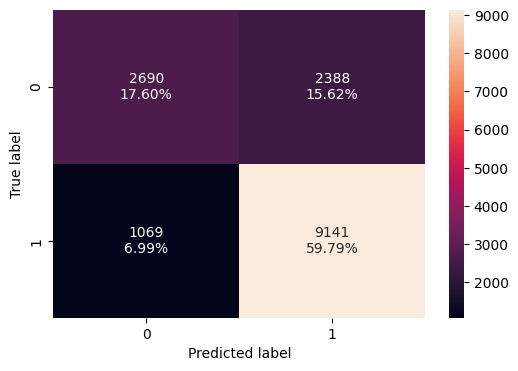

In [ ]:
confusion_matrix_sklearn(rf_tuned, X_train, y_train)

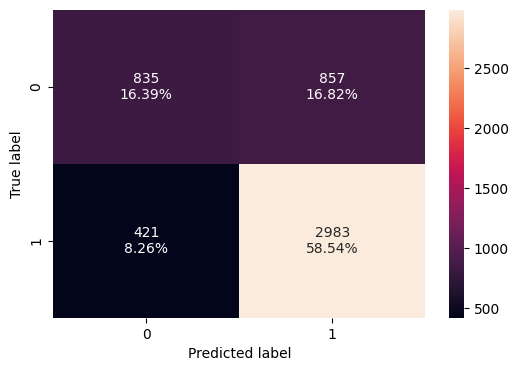

In [ ]:
confusion_matrix_sklearn(rf_tuned, X_val, y_val)

* The Random Forest saw a 0.109 improvement on the F1 score and is fitting the data much better

###GradientBoosting Tuned Original Data

###XGBoost Tuned Original Data

In [ ]:
# Choose the type of classifier.
model = XGBClassifier(random_state=1, eval_metrics='logloss')

# Grid of parameters to choose from
## add from article
parameters = {
    "n_estimators": np.arange(10,100,20),
    "max_depth": np.arange(3,10,2),
    "min_child_weight": np.arange(1,10,2),
    "scale_pos_weight":[0,1,2,5],
    "subsample":[0.5,0.7,0.9,1],
    "learning_rate":[0.01,0.1,0.2,0.05],
    "gamma":[0,1,3],
    "colsample_bytree":[0.5,0.7,0.9,1],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the randomized search
rand_obj = RandomizedSearchCV(model, parameters, scoring=scorer, cv=5, n_iter=50, n_jobs= -1)
rand_obj = rand_obj.fit(X_train, y_train)

print("Best parameters are {} with CV score={}:" .format(rand_obj.best_params_,rand_obj.best_score_))

Best parameters are {'subsample': 1, 'scale_pos_weight': 1, 'n_estimators': np.int64(90), 'min_child_weight': np.int64(5), 'max_depth': np.int64(3), 'learning_rate': 0.05, 'gamma': 1, 'colsample_bytree': 1} with CV score=0.8249714999582594:


In [ ]:
xgb_tuned = rand_obj.best_estimator_
xgb_tuned.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
              device=None, early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, eval_metrics='logloss', feature_types=None,
              gamma=1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=np.int64(3), max_leaves=None,
              min_child_weight=np.int64(5), missing=nan,
              monotone_constraints=None, multi_strategy=None,
              n_estimators=np.int64(90), n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
# Checking model's performance
get_all_model_scores(xgb_tuned, X_train, y_train)

,Accuracy,Recall,Precision,F1
Train,0.752,0.880,0.778,0.826
Validation,0.752,0.874,0.780,0.825


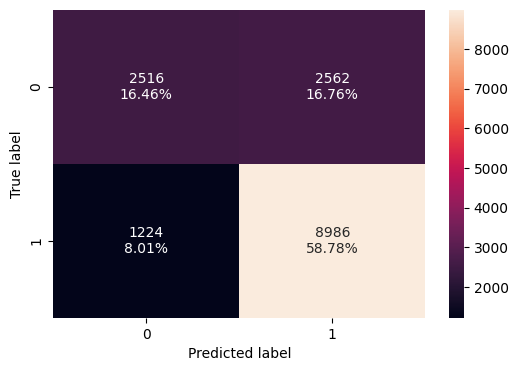

In [ ]:
confusion_matrix_sklearn(xgb_tuned, X_train, y_train)

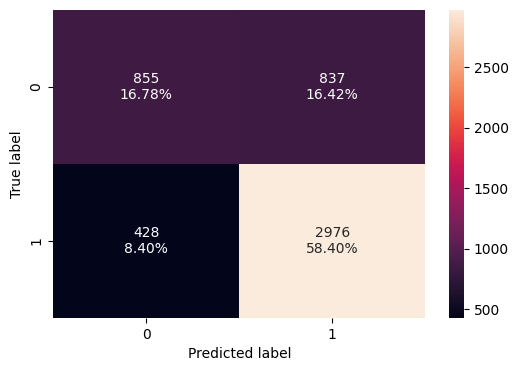

In [ ]:
confusion_matrix_sklearn(xgb_tuned, X_val, y_val)

* XGBoost saw a 0.017 increase in performance for F1
* However the model seems to now be overfitting the data

###XGBoost Tuned Oversampled Data

In [ ]:
# Choose the type of classifier.
model = XGBClassifier(random_state=1, eval_metrics='logloss')

# Grid of parameters to choose from
## add from article
parameters = {
    "n_estimators": np.arange(50,150,25),
    "max_depth": np.arange(3,10,2),
    "min_child_weight": np.arange(1,10,2),
    "scale_pos_weight":[0,1,2,5],
    "subsample":[0.5,0.7,0.9,1],
    "learning_rate":[0.01,0.1,0.2,0.05],
    "gamma":[0,1,3],
    "colsample_bytree":[0.5,0.7,0.9,1],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the randomized search
rand_obj = RandomizedSearchCV(model, parameters, scoring=scorer, cv=5, n_iter=50, n_jobs= -1)
rand_obj = rand_obj.fit(X_train_over, y_train_over)

print("Best parameters are {} with CV score={}:" .format(rand_obj.best_params_,rand_obj.best_score_))

Best parameters are {'subsample': 1, 'scale_pos_weight': 2, 'n_estimators': np.int64(100), 'min_child_weight': np.int64(5), 'max_depth': np.int64(7), 'learning_rate': 0.1, 'gamma': 1, 'colsample_bytree': 0.7} with CV score=0.8278366675456359:


In [ ]:
xgb_tuned_over = rand_obj.best_estimator_
xgb_tuned_over.fit(X_train_over, y_train_over)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None,
              eval_metrics='logloss', feature_types=None, gamma=1,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=np.int64(7), max_leaves=None,
              min_child_weight=np.int64(5), missing=nan,
              monotone_constraints=None, multi_strategy=None,
              n_estimators=np.int64(100), n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
# Checking model's performance
get_all_model_scores(xgb_tuned_over, X_train_over, y_train_over)

,Accuracy,Recall,Precision,F1
Train,0.817,0.975,0.741,0.842
Validation,0.730,0.945,0.730,0.824


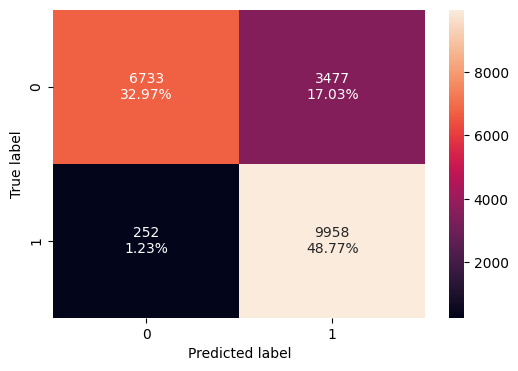

In [ ]:
confusion_matrix_sklearn(xgb_tuned_over, X_train_over, y_train_over)

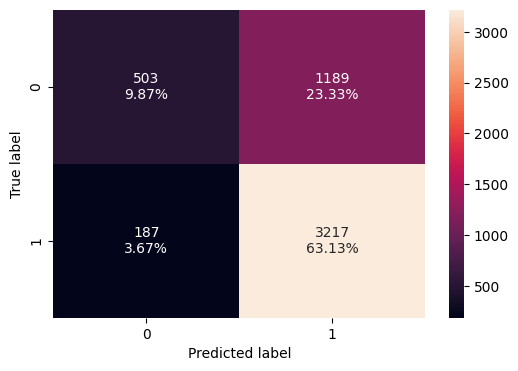

In [ ]:
confusion_matrix_sklearn(xgb_tuned_over, X_val, y_val)

*  The tuned XGBoost on the oversampled data improved the most and is not overfitting the data

## Model Performances

In [ ]:
# training performance comparison

rf1_train = model_performance_classification_sklearn(rf_tuned, X_train, y_train)
xgb_train = model_performance_classification_sklearn(xgb_tuned, X_train, y_train)
xgb2_train = model_performance_classification_sklearn(xgb_tuned_over, X_train_over, y_train_over)

models_train_comp_df = pd.concat(
    [
        rf1_train.T,
        xgb_train.T,
        xgb2_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "RandomForest Tuned trained with Original data",
    "XGBoost Tuned trained with Original data",
    "XGBoost Tuned trained with Oversampled data",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,RandomForest Tuned trained with Original data,XGBoost Tuned trained with Original data,XGBoost Tuned trained with Oversampled data
Accuracy,0.774,0.752,0.817
Recall,0.895,0.880,0.975
Precision,0.793,0.778,0.741
F1,0.841,0.826,0.842


In [ ]:
# validation performance comparison

rf1_val = model_performance_classification_sklearn(rf_tuned, X_val, y_val)
xgb_val = model_performance_classification_sklearn(xgb_tuned,  X_val, y_val)
xgb2_val = model_performance_classification_sklearn(xgb_tuned_over, X_val, y_val)

models_val_comp_df = pd.concat(
    [
        rf1_val.T,
        xgb_val.T,
        xgb2_val.T,
    ],
    axis=1,
)
models_val_comp_df.columns = [
    "RandomForest Tuned trained with Original data",
    "XGBoost Tuned trained with Original data",
    "XGBoost Tuned trained with Oversampled data",
]
print("Validation performance comparison:")
models_val_comp_df

Validation performance comparison:


,RandomForest Tuned trained with Original data,XGBoost Tuned trained with Original data,XGBoost Tuned trained with Oversampled data
Accuracy,0.749,0.752,0.730
Recall,0.876,0.874,0.945
Precision,0.777,0.780,0.730
F1,0.824,0.825,0.824


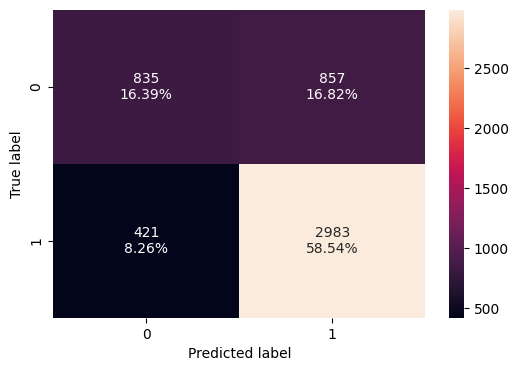

In [ ]:
confusion_matrix_sklearn(rf_tuned, X_val, y_val)

* We can see that the Random Forest performed the best without overfitting the data
* Lets see how it does on unseen data with the test sample

In [ ]:
# Let's check the performance on test set
rf_test = model_performance_classification_sklearn(rf_tuned, X_test, y_test)
rf_test

,Accuracy,Recall,Precision,F1
0,0.741,0.874,0.769,0.818


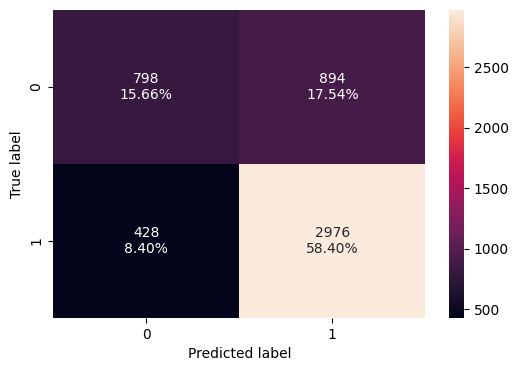

In [ ]:
confusion_matrix_sklearn(rf_tuned, X_test, y_test)

* The model performed similar to the validation so the model generalizes well

###Feature Importance

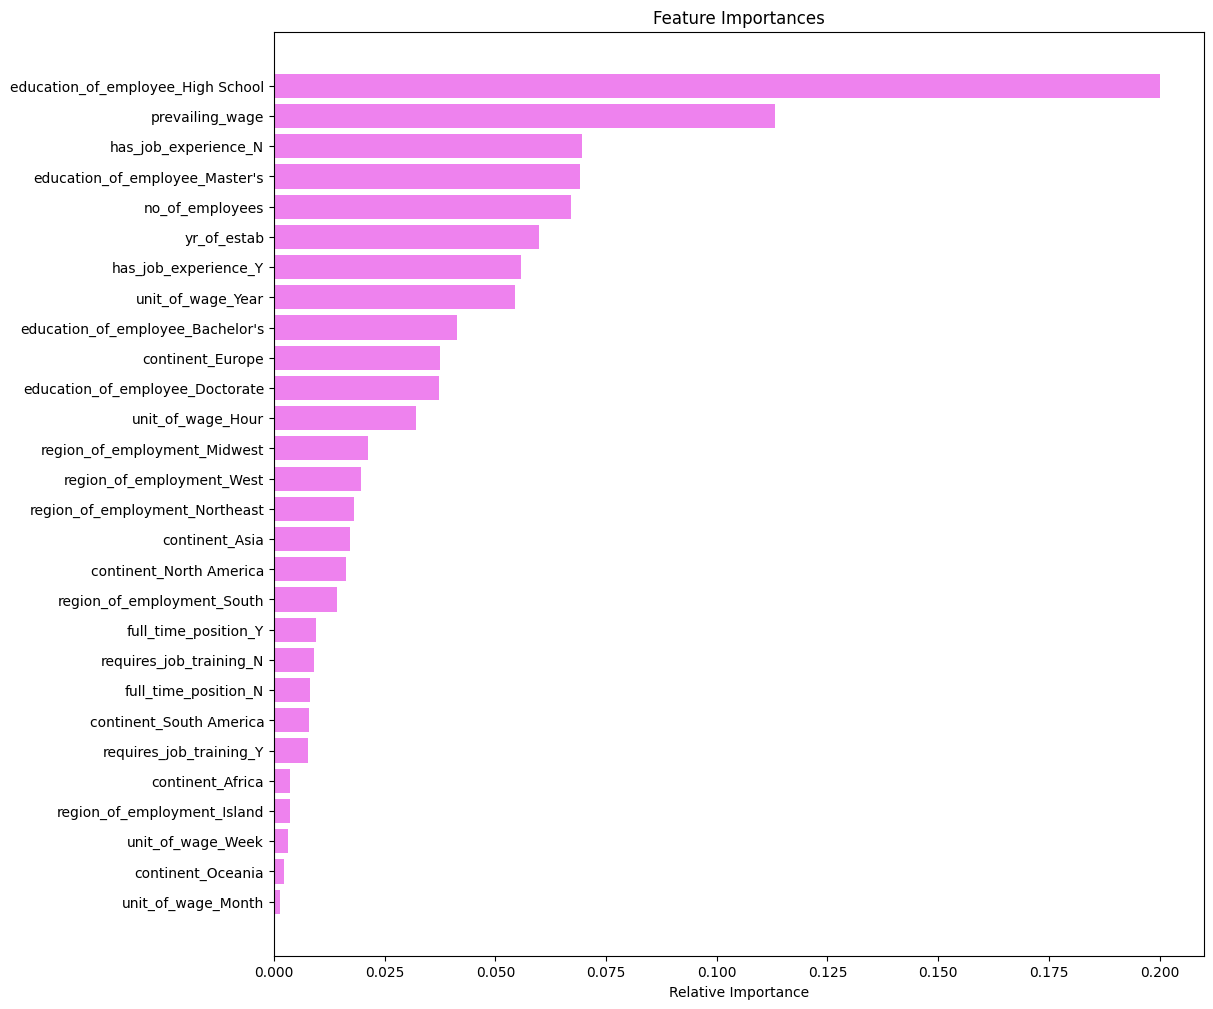

In [ ]:
feature_names = X_train.columns
importances = rf_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* We can see that the most important feature by far was a High School education
* Its followed by prevailing wage and then not having job experience and Masters education

## Actionable Insights and Recommendations

### Insights

* Education and Wage: The feature importance analysis indicates that education and prevailing wage are significant predictors of visa certification. This indicates that the higher the education and pay, the better chance an applicant has for visa approval. These two align with the goal of seeking the top talent since they will have the highest education and seek the highest paying jobs.
* Experience: Job experience is another important feature for visa certification. A higher job experience increases an applicants chances for approval, which aligns with the companies goal of seeking quality talent.
* Model Performance: The model chosen was the Tuned Random Forest trained on original data. The model performed well on all four scores without overfitting and scored one of the highest on F1 which fulfilled the model criteria. The model also performed well on new unseen test data indicating the model generalizes well and can be used for production.

### Recommendations

* Prioritizing applications with higher education, prior work experience, and higher wages since these are most likely to get approved.
* Implement the Tuned Random Forest model to short list candidates as a method of fast tracking candidates. However, ensure to have a human review candidates prior to approving.
* Continuously improve the model with new training data as well as monitoring it and updating it when needed. Pay attention to new feature importance as these may change with new trends.

<font size=6 color='blue'>Power Ahead</font>
___